# Loading the Dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import operator

In [ ]:
song_metadata = pd.read_csv('ml_project_dataset_1/song_data.csv')

In [ ]:
song_metadata.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [ ]:
song_metadata.nunique()

song_id        999056
title          702428
release        149288
artist_name     72665
year               90
dtype: int64

In [ ]:
song_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [ ]:
song_metadata.dropna(inplace=True)

In [ ]:
user_song_info = pd.read_csv('ml_project_dataset_1/10000.txt',sep='\t',header=None)
user_song_info.columns = ['user_id', 'song_id', 'listen_count']

In [ ]:
user_song_info.dropna(inplace=True)

In [ ]:
user_song_info.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [ ]:
## Unique count of each column
pd.DataFrame(user_song_info.nunique()).rename(columns={0:'Unique count'}).rename_axis(index='field')

,Unique count
field,
user_id,76353
song_id,10000
listen_count,295


In [ ]:
user_song_info.shape

(2000000, 3)

In [ ]:
total_users = user_song_info['user_id'].nunique()
print(total_users)

76353


In [ ]:
total_songs = user_song_info['song_id'].nunique()
print(total_songs)

10000


In [ ]:
#Questions to be answered

#User based analysis

#What is the average number of songs a user listens?
#What is the average number of times a user listens to a song?
#What is the maximum number of times a user listened to a song?

#song based analysis

#What is the maximum number of songs listened by a single user?
#What is the number of times a song was listened to -> {total_number_of_plays}
#What is the maximum number of times a song was listened to(by a single user)?(Addictive songs)
#What is the most addictive song (song_score)?

#Year-wise user-song subscription(all users)
#Artist popularity(Subscribed users count)
#user-wise subscription to songs of an year
#Presence of an artist in various years
#Yearwise releases of a Release(company)
#Artist-Yearwise releases

### User based analysis

In [ ]:
user_group = user_song_info.groupby('user_id')

In [ ]:
#Columns are - user_id,song_id,listen_count

In [ ]:
# user_songs_mapping = {'user_id':[],'songs_listened':[],'average_listen_count':[],'songs':[]}
# songs = []

user_songs_mapping = {'user_id':[],'songs_listened':[],'average_listen_count':[],'songs':[]}
songs = []

In [ ]:
for user,user_df in user_group:

    user_songs_mapping['user_id'].append(user)
    user_songs_mapping['songs_listened'].append(user_df['song_id'].count())

    user_songs_mapping['average_listen_count'].append(user_df['listen_count'].sum()/user_df['song_id'].count())

    user_songs_mapping['songs'].append(dict(zip(user_df['song_id'],user_df['listen_count'])))

In [ ]:
user_songs_df = pd.DataFrame(user_songs_mapping)

In [ ]:
user_songs_df = user_songs_df.sort_values(by='songs_listened',ascending=False)

In [ ]:
average_songs_per_user = user_songs_df['songs_listened'].mean()
print(f'A user on an average listens to : {average_songs_per_user} songs')
average_listen_count = user_songs_df['average_listen_count'].mean()
print(f'A user on an average listens to a song {average_listen_count} times')

A user on an average listens to : 26.194124657839247 songs
A user on an average listens to a song 3.1965333469117465 times


In [ ]:
user_songs_df
# Maximum songs listened by an user

,user_id,songs_listened,average_listen_count,songs
32542,6d625c6557df84b60d90426c0116138b617b9449,711,4.897328,"{'SOACRBY12AB017C757': 9, 'SOADFMR12A6701FB5F'..."
75144,fbee1c8ce1a346fa07d2ef648cec81117438b91f,643,1.908243,"{'SOABJTC12A58A7DE0E': 2, 'SOACPBY12A8C13FEF9'..."
23297,4e11f45d732f4861772b2906f81a7d384552ad12,556,1.818345,"{'SOABJBU12A8C13F63F': 2, 'SOADISH12AB018DFAC'..."
10807,24b98f8ab023f6e7a1c37c7729c623f7b821eb95,540,2.137037,"{'SOAAMOW12AB018149B': 1, 'SOAARXR12A8C133D15'..."
7834,1aa4fd215aadb160965110ed8a829745cde319eb,533,2.675422,"{'SOAAFAC12A67ADF7EB': 3, 'SOAFTRR12AF72A8D4D'..."
...,...,...,...,...
4929,10d3b027f494805b9223551e3db03f903953e2cf,1,2.000000,{'SOJPPGA12A58A769A7': 2}
40445,87c22fcd7f5f833a8e33ba8bc5c7f4863dab5aa8,1,2.000000,{'SOSGEGU12AB018188A': 2}
19698,421be8356c6464ae9da340754c1b0b9510ae50b5,1,6.000000,{'SOQPYQS12A58A7B8DF': 6}
40417,87a2826a059570052283d542fc03651c3a570afb,1,2.000000,{'SOWGXOP12A6701E93A': 2}


In [ ]:
user_songs_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.96,0.97,0.98,0.99,0.995])

,songs_listened,average_listen_count
count,76353.000000,76353.000000
mean,26.194125,3.196533
std,31.625078,3.686770
min,1.000000,1.000000
25%,9.000000,1.416667
50%,16.000000,2.166667
75%,31.000000,3.615385
90%,58.000000,6.074628
95%,82.000000,8.500000
96%,91.000000,9.428571


In [ ]:
total_songs_covered = []

In [ ]:
user_songs_df['songs'].apply(lambda x:total_songs_covered.extend(list(x.keys())))

32542    None
75144    None
23297    None
10807    None
7834     None
         ... 
4929     None
40445    None
19698    None
40417    None
56932    None
Name: songs, Length: 76353, dtype: object

In [ ]:
total_songs_covered = list(set(total_songs_covered))
len(total_songs_covered)

10000

### Super user data

In [ ]:
super_user_data = user_songs_df[user_songs_df['songs_listened']>=500]
super_user_data['favorite_song'] = super_user_data['songs'].apply(lambda x:max(x,key=x.get))
super_user_data['favorite_song_count'] = super_user_data['songs'].apply(lambda x:max(x.items(),key=operator.itemgetter(1))[1])
super_user_data

C:\Users\class\AppData\Local\Temp\ipykernel_31884\1563688363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_user_data['favorite_song'] = super_user_data['songs'].apply(lambda x:max(x,key=x.get))
C:\Users\class\AppData\Local\Temp\ipykernel_31884\1563688363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_user_data['favorite_song_count'] = super_user_data['songs'].apply(lambda x:max(x.items(),key=operator.itemgetter(1))[1])


,user_id,songs_listened,average_listen_count,songs,favorite_song,favorite_song_count
32542,6d625c6557df84b60d90426c0116138b617b9449,711,4.897328,"{'SOACRBY12AB017C757': 9, 'SOADFMR12A6701FB5F'...",SOBNPFN12A8C142E6F,225
75144,fbee1c8ce1a346fa07d2ef648cec81117438b91f,643,1.908243,"{'SOABJTC12A58A7DE0E': 2, 'SOACPBY12A8C13FEF9'...",SOWULFH12A81C225EA,42
23297,4e11f45d732f4861772b2906f81a7d384552ad12,556,1.818345,"{'SOABJBU12A8C13F63F': 2, 'SOADISH12AB018DFAC'...",SOVHVYD12A6D4FA244,28
10807,24b98f8ab023f6e7a1c37c7729c623f7b821eb95,540,2.137037,"{'SOAAMOW12AB018149B': 1, 'SOAARXR12A8C133D15'...",SOBUBLL12A58A795A8,28
7834,1aa4fd215aadb160965110ed8a829745cde319eb,533,2.675422,"{'SOAAFAC12A67ADF7EB': 3, 'SOAFTRR12AF72A8D4D'...",SOWXDVT12B0B80BFA3,27
52662,b04e41133dd3d30a5631cc8589a1eadd48a8bd53,523,2.170172,"{'SOAAMOW12AB018149B': 1, 'SOABNPW12A6D4FC9B5'...",SOVSPCM12A67ADE7A8,16
6480,15eeb36ae1c62d60de9fdeea0d121eb7d08713be,522,2.078544,"{'SOAACPJ12A81C21360': 8, 'SOAARXR12A8C133D15'...",SOBUBLL12A58A795A8,16
48273,a15075a926c1998d91940f118342ba8356efc7d4,502,2.794821,"{'SOAAVUV12AB0186646': 2, 'SOADJQJ12A8C141D38'...",SOBXHDL12A81C204C0,24


In [ ]:
super_user_data

,user_id,songs_listened,average_listen_count,songs,favorite_song,favorite_song_count
32542,6d625c6557df84b60d90426c0116138b617b9449,711,4.897328,"{'SOACRBY12AB017C757': 9, 'SOADFMR12A6701FB5F'...",SOBNPFN12A8C142E6F,225
75144,fbee1c8ce1a346fa07d2ef648cec81117438b91f,643,1.908243,"{'SOABJTC12A58A7DE0E': 2, 'SOACPBY12A8C13FEF9'...",SOWULFH12A81C225EA,42
23297,4e11f45d732f4861772b2906f81a7d384552ad12,556,1.818345,"{'SOABJBU12A8C13F63F': 2, 'SOADISH12AB018DFAC'...",SOVHVYD12A6D4FA244,28
10807,24b98f8ab023f6e7a1c37c7729c623f7b821eb95,540,2.137037,"{'SOAAMOW12AB018149B': 1, 'SOAARXR12A8C133D15'...",SOBUBLL12A58A795A8,28
7834,1aa4fd215aadb160965110ed8a829745cde319eb,533,2.675422,"{'SOAAFAC12A67ADF7EB': 3, 'SOAFTRR12AF72A8D4D'...",SOWXDVT12B0B80BFA3,27
52662,b04e41133dd3d30a5631cc8589a1eadd48a8bd53,523,2.170172,"{'SOAAMOW12AB018149B': 1, 'SOABNPW12A6D4FC9B5'...",SOVSPCM12A67ADE7A8,16
6480,15eeb36ae1c62d60de9fdeea0d121eb7d08713be,522,2.078544,"{'SOAACPJ12A81C21360': 8, 'SOAARXR12A8C133D15'...",SOBUBLL12A58A795A8,16
48273,a15075a926c1998d91940f118342ba8356efc7d4,502,2.794821,"{'SOAAVUV12AB0186646': 2, 'SOADJQJ12A8C141D38'...",SOBXHDL12A81C204C0,24


In [ ]:
songs_covered_by_super_users = []

In [ ]:
super_user_data['songs'].apply(lambda x:songs_covered_by_super_users.extend(list(x.keys())))

32542    None
75144    None
23297    None
10807    None
7834     None
52662    None
6480     None
48273    None
Name: songs, dtype: object

In [ ]:
len(songs_covered_by_super_users),len(set(songs_covered_by_super_users))

(4530, 3165)

In [ ]:
def user_song_coverage(top_user_count):
    songs_covered_by_super_users = []
    df = user_songs_df.head(top_user_count)
    df['songs'].apply(lambda x:songs_covered_by_super_users.extend(list(x.keys())))
    coverage_percentage = len(set(songs_covered_by_super_users))/10000
    print(f"Top {top_user_count} superusers cover {coverage_percentage} percent songs.")

In [ ]:
top_x_super_users = [10,20,30,40,50,60,70,80,90,100,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3250,3500,3750,4000]

In [ ]:
result = map(user_song_coverage,top_x_super_users)

In [ ]:
list(result)

Top 10 superusers cover 0.3361 percent songs.
Top 20 superusers cover 0.4676 percent songs.
Top 30 superusers cover 0.562 percent songs.
Top 40 superusers cover 0.5978 percent songs.
Top 50 superusers cover 0.6534 percent songs.
Top 60 superusers cover 0.6906 percent songs.
Top 70 superusers cover 0.7188 percent songs.
Top 80 superusers cover 0.7563 percent songs.
Top 90 superusers cover 0.7771 percent songs.
Top 100 superusers cover 0.7965 percent songs.
Top 250 superusers cover 0.9241 percent songs.
Top 500 superusers cover 0.9748 percent songs.
Top 750 superusers cover 0.9897 percent songs.
Top 1000 superusers cover 0.9939 percent songs.
Top 1250 superusers cover 0.9971 percent songs.
Top 1500 superusers cover 0.9979 percent songs.
Top 1750 superusers cover 0.9985 percent songs.
Top 2000 superusers cover 0.999 percent songs.
Top 2250 superusers cover 0.9993 percent songs.
Top 2500 superusers cover 0.9996 percent songs.
Top 2750 superusers cover 0.9996 percent songs.
Top 3000 superus

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
user_songs_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.96,0.97,0.98,0.99,0.995])

,songs_listened,average_listen_count
count,76353.000000,76353.000000
mean,26.194125,3.196533
std,31.625078,3.686770
min,1.000000,1.000000
25%,9.000000,1.416667
50%,16.000000,2.166667
75%,31.000000,3.615385
90%,58.000000,6.074628
95%,82.000000,8.500000
96%,91.000000,9.428571


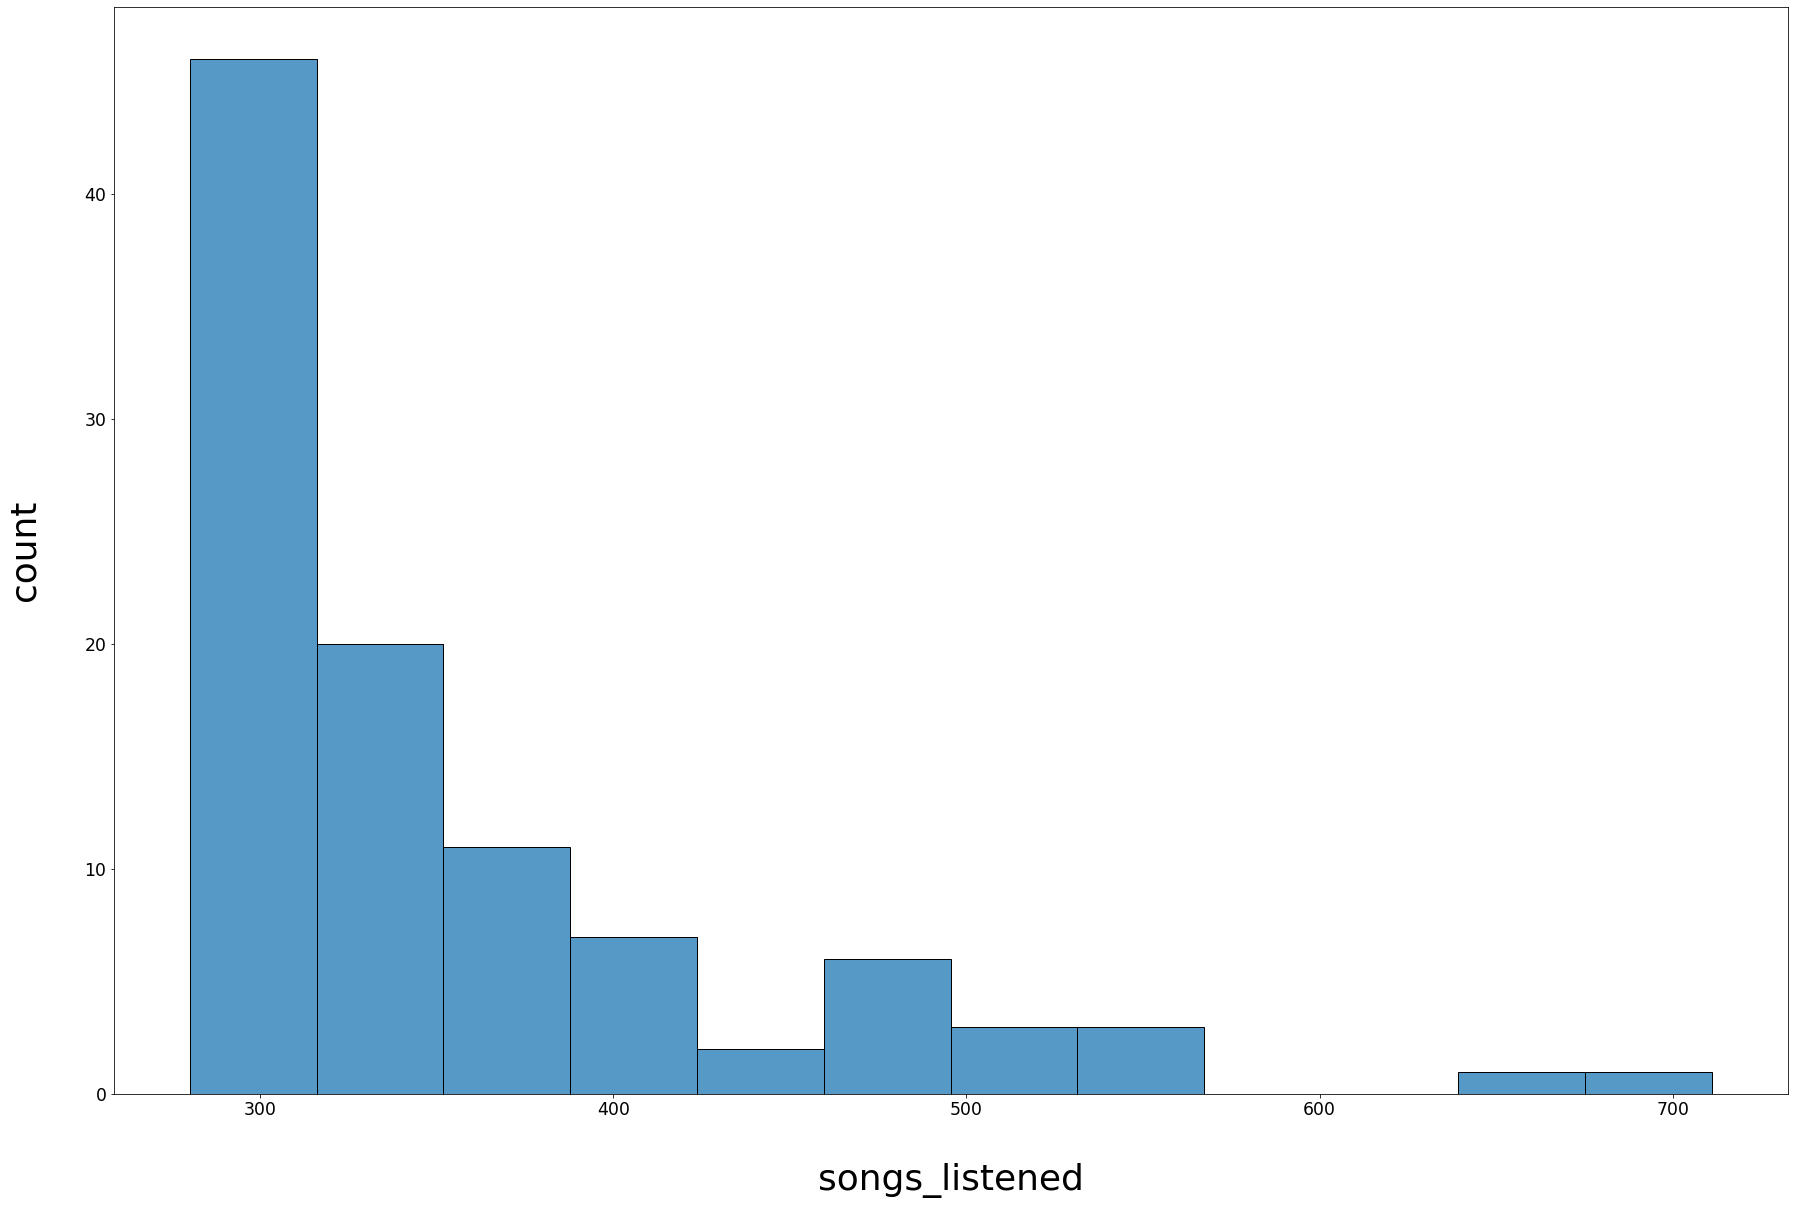

In [ ]:
#top 100 users by number of songs listened
top_100_users = user_songs_df.head(100)
plt.figure(figsize=(30,20))
#sns.displot(top_100_users['songs_listened'],kde=True)
sns.histplot(top_100_users['songs_listened'])
plt.xticks(size='xx-large')
plt.yticks(size='xx-large')
plt.xlabel(xlabel = '\nsongs_listened',fontdict={'size':36})
plt.ylabel(ylabel='count\n',fontdict={'size':36})
plt.show()

In [ ]:
most_num_times_song_listened_by_user = user_song_info[user_song_info['listen_count'] == user_song_info['listen_count'].max()]
most_num_times_song_listened_by_user

,user_id,song_id,listen_count
1228366,d13609d62db6df876d3cc388225478618bb7b912,SOFCGSE12AF72A674F,2213


In [ ]:
user_song_info['song_id'].nunique()

10000

In [ ]:
song_metadata

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
...,...,...,...,...,...
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0
999998,SOLXGOR12A81C21EB7,Faraday,The Trance Collection Vol. 2,Elude,0


In [ ]:
all_data_df = pd.merge(song_metadata,user_song_info,on='song_id')

In [ ]:
all_data_df[all_data_df['year']==0]

,song_id,title,release,artist_name,year,user_id,listen_count
402,SOQBGZD12AB0184341,Rewind (Demo),Riot!,Paramore,0,1b704d4cddabea8258bd93497fcb73eab32fa592,2
403,SOQBGZD12AB0184341,Rewind (Demo),Riot!,Paramore,0,76235885b32c4e8c82760c340dc54f9b608d7d7e,1
404,SOQBGZD12AB0184341,Rewind (Demo),Riot!,Paramore,0,cc2dc14c7dac1037a3beed1c9094a6d710f3ee98,6
405,SOQBGZD12AB0184341,Rewind (Demo),Riot!,Paramore,0,fa40b11a2509c5e159bcb444890d9200aed0e268,1
406,SOQBGZD12AB0184341,Rewind (Demo),Riot!,Paramore,0,c7205abbf880359a5f105b6040c910ad2ff9dfb7,1
...,...,...,...,...,...,...,...
2085738,SOSRUEV12A8C136EC5,Bounce That,Night Ripper,Girl Talk,0,746a8c19eff1d0d55f6ff844a92e572b81d0bac0,1
2085739,SOSRUEV12A8C136EC5,Bounce That,Night Ripper,Girl Talk,0,d13e7cd79e6b1cbf4bf1fc3f758b520ad2021fe4,1
2085740,SOSRUEV12A8C136EC5,Bounce That,Night Ripper,Girl Talk,0,763cd03c9b9b3bb88797c1eed65ae361c0bd9c57,1
2085741,SOSRUEV12A8C136EC5,Bounce That,Night Ripper,Girl Talk,0,7f601affb4b7d01e397ff620092d26cd7495e31d,1


In [ ]:
#all_data_df[all_data_df['song_id']=='SOFCGSE12AF72A674F'].sort_values(by='listen_count',ascending=False)

### Song based analysis

In [ ]:
#Dataframes created user_song_info,user_songs_df

In [ ]:
song_groups = user_song_info.groupby('song_id')
song_analysis = {'song_id':[],'total_plays':[],'average_listen_count':[],'total_listeners':[]}

In [ ]:
for song,song_df in song_groups:
    song_analysis['song_id'].append(song)
    total_listen_count = song_df['listen_count'].sum()
    song_analysis['total_plays'].append(total_listen_count)
    song_analysis['average_listen_count'].append(total_listen_count/song_df['user_id'].count())
    song_analysis['total_listeners'].append(song_df['user_id'].count())

In [ ]:
song_analysis_df = pd.DataFrame(song_analysis)

In [ ]:
song_analysis_df = song_analysis_df.sort_values(by='total_plays',ascending=False)

In [ ]:
song_metadata

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
...,...,...,...,...,...
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0
999998,SOLXGOR12A81C21EB7,Faraday,The Trance Collection Vol. 2,Elude,0


In [ ]:
song_id_title_mapping = song_metadata[['song_id','title']]
song_id_title_mapping['title'] = song_id_title_mapping['title']

C:\Users\class\AppData\Local\Temp\ipykernel_31884\4020805410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_id_title_mapping['title'] = song_id_title_mapping['title']


In [ ]:
song_analysis_df = pd.merge(song_analysis_df,song_id_title_mapping,on='song_id')

In [ ]:
song_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10269 entries, 0 to 10268
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   song_id               10269 non-null  object 
 1   total_plays           10269 non-null  int64  
 2   average_listen_count  10269 non-null  float64
 3   total_listeners       10269 non-null  int64  
 4   title                 10269 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 481.4+ KB


In [ ]:
song_analysis_df['title'] = song_analysis_df.title.str.strip()

In [ ]:
song_analysis_df.dropna(inplace=True)
song_analysis_df

,song_id,total_plays,average_listen_count,total_listeners,title
0,SOBONKR12A58A7A7E0,54136,8.442920,6412,You're The One
1,SOAUWYT12A81C206F1,49253,7.004124,7032,Undo
2,SOSXLTC12AF72A7F54,41418,6.740114,6145,Revelry
3,SOEGIYH12A6D4FC0E3,31153,5.785144,5385,Horn Concerto No. 4 in E flat K495: II. Romanc...
4,SOFRQTD12A81C233C0,31036,3.749668,8277,Sehr kosmisch
...,...,...,...,...,...
10264,SOAKZQA12A6D4F80C1,76,1.169231,65,Summer In Dixie (LP Version)
10265,SOSLEFC12A6D4FC740,75,1.102941,68,Slan Le Maige
10266,SOENALO12AB01836F5,73,1.216667,60,Traveling Man
10267,SONQGQE12A670209BC,73,1.177419,62,Robot Rock (Soulwax Remix)


In [ ]:
song_analysis_df.nunique()

song_id                 10000
total_plays              1757
average_listen_count     8227
total_listeners           824
title                    9593
dtype: int64

### Title - song_id analysis

In [ ]:
title_analysis = {'title':[],'songs_associated':[],'song_count':[]}

In [ ]:
title_group = song_analysis_df.groupby('title')

for title,title_df in title_group:
    title_analysis['title'].append(title)
    song_id = title_df['song_id']
    title_analysis['songs_associated'].append(list(set(song_id)))
    title_analysis['song_count'].append(len(set(song_id)))

In [ ]:
title_analysis_df = pd.DataFrame(title_analysis)

In [ ]:
title_analysis_df.sort_values('song_count',ascending=False)

,title,songs_associated,song_count
1087,Breathe,"[SOJDNPX12A6310E10F, SOEUORE12A8C13953D, SONNB...",8
740,Beautiful,"[SOZWVZW12AF72A0E04, SOSUADS12A58A80A47, SOGXE...",6
3391,Hold On,"[SOPILMY12A8151AB6A, SOFKTPP12A8C1385CA, SOVOL...",5
3508,Human,"[SOSDNSV12AB0181074, SOWYUCN12A8C144790, SOJWF...",5
3409,Holiday,"[SOEWAKD12AB01860D5, SOXHHAO12A8C139833, SOMZI...",4
...,...,...,...
3265,Hell Breaks Loose,[SOMCYXR12AB01897B4],1
3266,Hell On The Heart,[SOIWPRZ12AB018244E],1
3267,Hell Yeah Featuring P. Diddy (Explicit Album V...,[SOHNYSV12AF729EADD],1
3268,Hell Yes,[SOGIPOB12A6701CC4A],1


In [ ]:
title_analysis_df.describe()

,song_count
count,9593.000000
mean,1.045658
std,0.260717
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,8.000000


### Title - song_id analysis ends

### Song id  - title mapping adjustment

In [ ]:
song_analysis_df

,song_id,total_plays,average_listen_count,total_listeners,title
0,SOBONKR12A58A7A7E0,54136,8.442920,6412,You're The One
1,SOAUWYT12A81C206F1,49253,7.004124,7032,Undo
2,SOSXLTC12AF72A7F54,41418,6.740114,6145,Revelry
3,SOEGIYH12A6D4FC0E3,31153,5.785144,5385,Horn Concerto No. 4 in E flat K495: II. Romanc...
4,SOFRQTD12A81C233C0,31036,3.749668,8277,Sehr kosmisch
...,...,...,...,...,...
10264,SOAKZQA12A6D4F80C1,76,1.169231,65,Summer In Dixie (LP Version)
10265,SOSLEFC12A6D4FC740,75,1.102941,68,Slan Le Maige
10266,SOENALO12AB01836F5,73,1.216667,60,Traveling Man
10267,SONQGQE12A670209BC,73,1.177419,62,Robot Rock (Soulwax Remix)


In [ ]:
song_analysis_df = pd.merge(song_analysis_df,song_metadata[['song_id','release','artist_name','year']],on='song_id')

In [ ]:
song_analysis_df.nunique()

song_id                 10000
total_plays              1757
average_listen_count     8227
total_listeners           824
title                    9593
release                  5445
artist_name              3379
year                       58
dtype: int64

In [ ]:
song_analysis_df['title_artist'] = song_analysis_df['title']+'_'+song_analysis_df['artist_name']

In [ ]:
song_analysis_df

,song_id,total_plays,average_listen_count,total_listeners,title,release,artist_name,year,title_artist
0,SOBONKR12A58A7A7E0,54136,8.442920,6412,You're The One,If There Was A Way,Dwight Yoakam,1990,You're The One_Dwight Yoakam
1,SOAUWYT12A81C206F1,49253,7.004124,7032,Undo,Vespertine Live,Björk,2001,Undo_Björk
2,SOSXLTC12AF72A7F54,41418,6.740114,6145,Revelry,Only By The Night,Kings Of Leon,2008,Revelry_Kings Of Leon
3,SOEGIYH12A6D4FC0E3,31153,5.785144,5385,Horn Concerto No. 4 in E flat K495: II. Romanc...,Mozart - Eine kleine Nachtmusik,Barry Tuckwell/Academy of St Martin-in-the-Fie...,0,Horn Concerto No. 4 in E flat K495: II. Romanc...
4,SOFRQTD12A81C233C0,31036,3.749668,8277,Sehr kosmisch,Musik von Harmonia,Harmonia,0,Sehr kosmisch_Harmonia
...,...,...,...,...,...,...,...,...,...
10838,SOAKZQA12A6D4F80C1,76,1.169231,65,Summer In Dixie (LP Version),Notorious,Confederate Railroad,1994,Summer In Dixie (LP Version)_Confederate Railroad
10839,SOSLEFC12A6D4FC740,75,1.102941,68,Slan Le Maige,Heroes,Reel Feelings,0,Slan Le Maige_Reel Feelings
10840,SOENALO12AB01836F5,73,1.216667,60,Traveling Man,Spirits All Around Us,John Brown's Body,2001,Traveling Man_John Brown's Body
10841,SONQGQE12A670209BC,73,1.177419,62,Robot Rock (Soulwax Remix),Robot Rock,Daft Punk,2005,Robot Rock (Soulwax Remix)_Daft Punk


In [ ]:
song_analysis_df.nunique()

song_id                 10000
total_plays              1757
average_listen_count     8227
total_listeners           824
title                    9593
release                  5445
artist_name              3379
year                       58
title_artist             9988
dtype: int64

In [ ]:
song_analysis_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.96,0.97,0.98,0.99,0.995])

,total_plays,average_listen_count,total_listeners,year
count,10843.000000,10843.000000,10843.000000,10843.000000
mean,629.346214,2.843654,209.315872,1655.435304
std,1398.352862,1.244164,332.429046,756.056709
min,71.000000,1.061728,48.000000,0.000000
25%,224.000000,2.054054,90.000000,1986.000000
50%,344.000000,2.595745,127.000000,2002.000000
75%,606.000000,3.255002,209.000000,2007.000000
90%,1121.000000,4.283376,363.000000,2008.000000
95%,1735.000000,5.142857,523.800000,2009.000000
96%,2011.280000,5.420291,596.320000,2009.000000


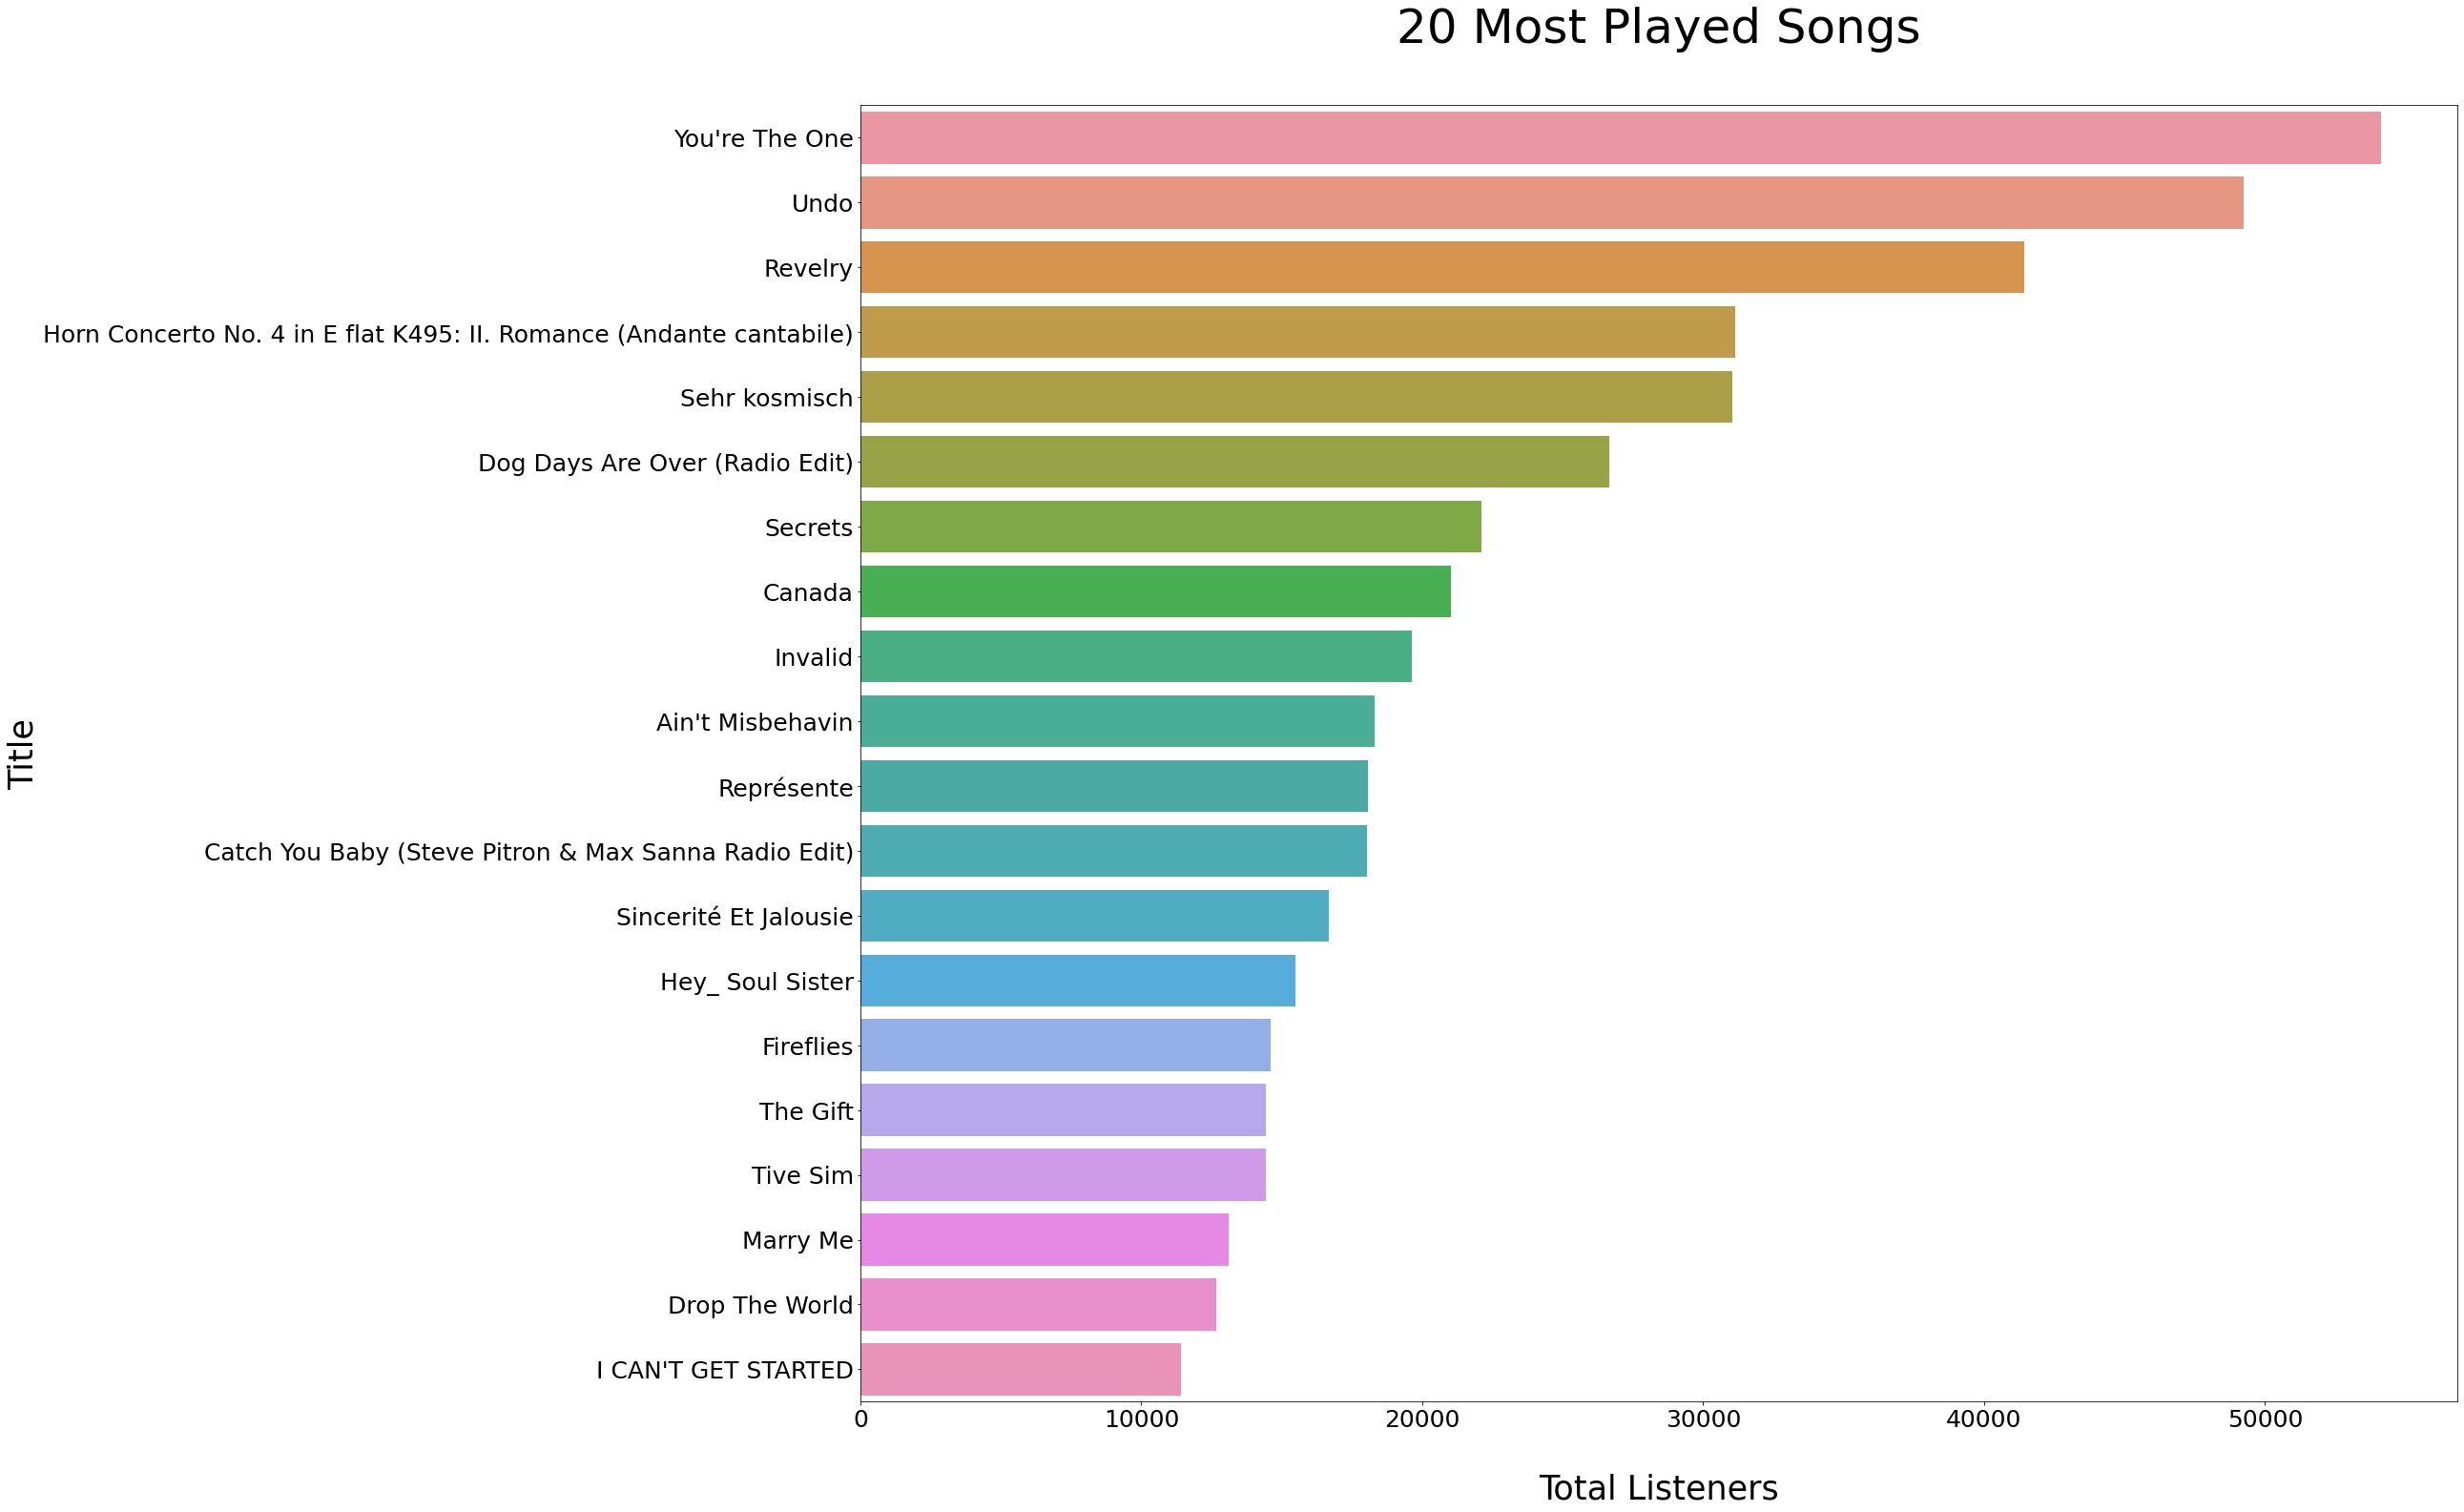

In [ ]:
#Bar plot on total listeners
plt.figure(figsize=(30,25))
sns.barplot(data = song_analysis_df.head(20),y='title',x='total_plays')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(xlabel ='\nTotal Listeners',fontdict={'fontsize':35})
plt.ylabel(ylabel ='Title',fontdict={'fontsize':35})
plt.title('20 Most Played Songs\n',fontsize=50)
plt.show()

In [ ]:
top_20_most_played_songs = set(song_analysis_df.head(20)['title'])
top_20_most_played_songs

{"Ain't Misbehavin",
 'Canada',
 'Catch You Baby (Steve Pitron & Max Sanna Radio Edit)',
 'Dog Days Are Over (Radio Edit)',
 'Drop The World',
 'Fireflies',
 'Hey_ Soul Sister',
 'Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)',
 "I CAN'T GET STARTED",
 'Invalid',
 'Marry Me',
 'Représente',
 'Revelry',
 'Secrets',
 'Sehr kosmisch',
 'Sincerité Et Jalousie',
 'The Gift',
 'Tive Sim',
 'Undo',
 "You're The One"}

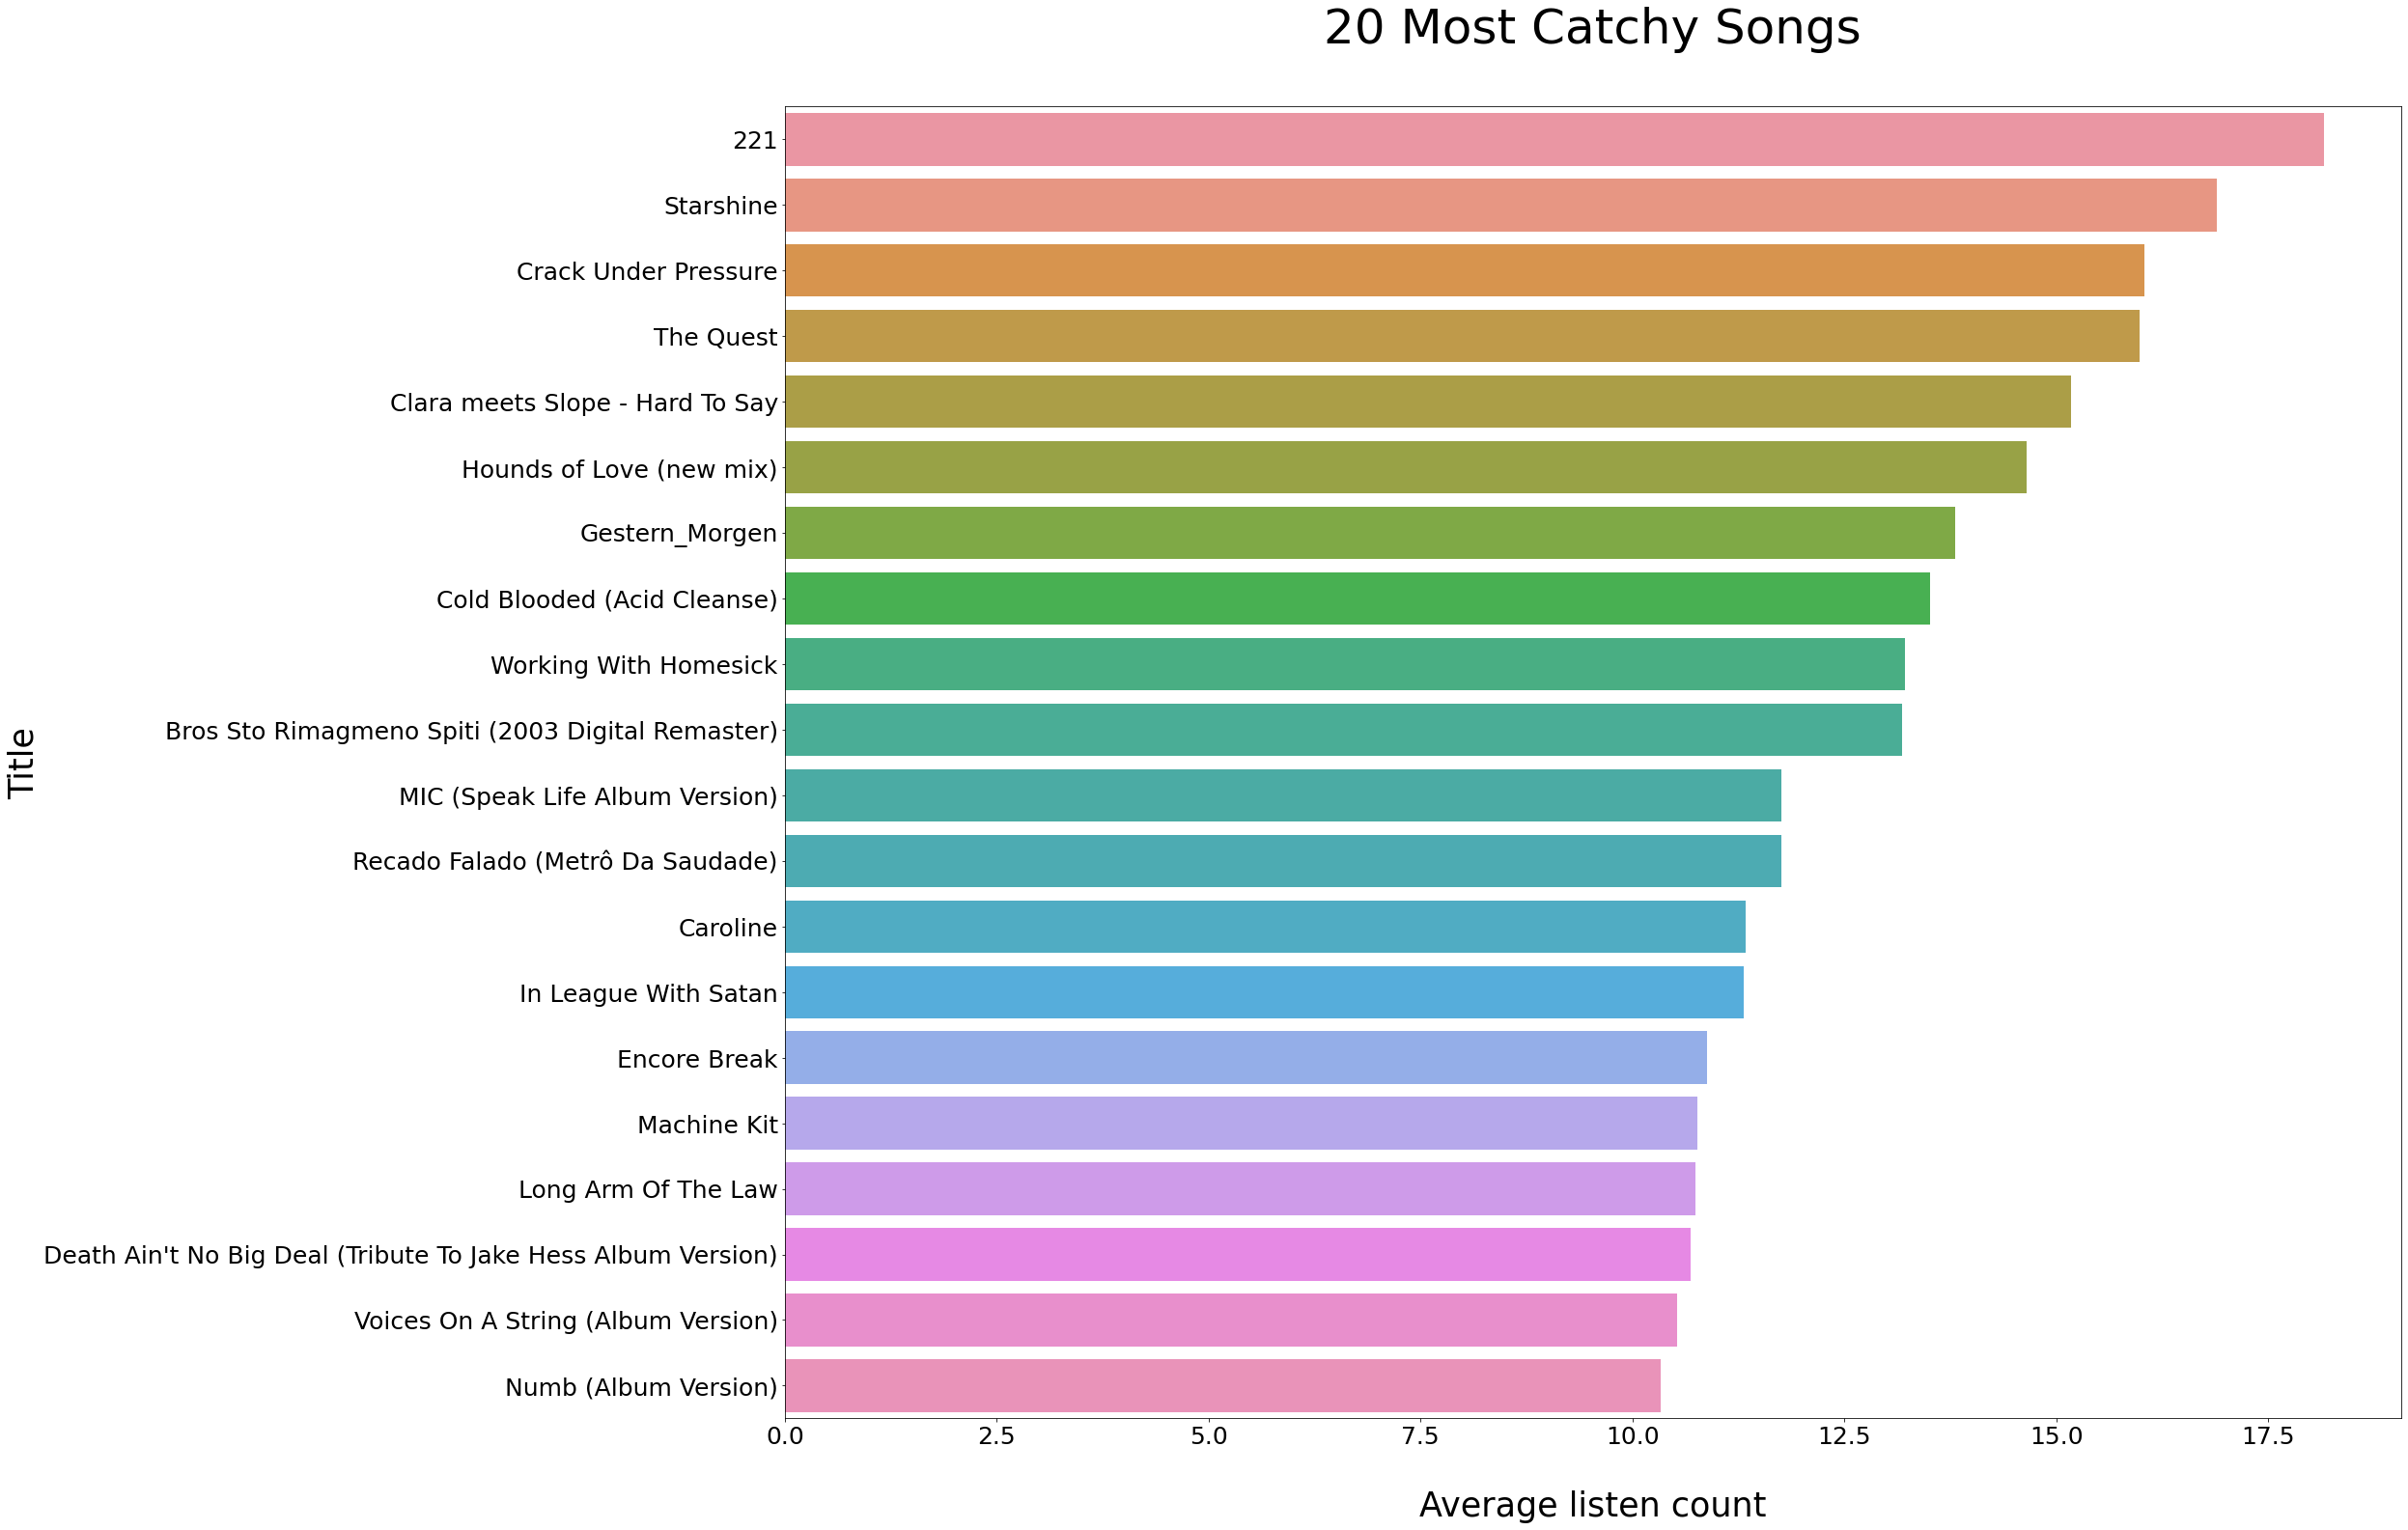

In [ ]:
#Bar plot on average listen count
plt.figure(figsize=(30,25))
sns.barplot(data = song_analysis_df.sort_values(by='average_listen_count',ascending=False).head(20),y='title',x='average_listen_count')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(xlabel ='\nAverage listen count',fontdict={'fontsize':35})
plt.ylabel(ylabel ='Title',fontdict={'fontsize':35})
plt.title('20 Most Catchy Songs\n',fontsize=50)
plt.show()

In [ ]:
top_20_by_listen_count = set(song_analysis_df.sort_values(by='average_listen_count',ascending=False).head(20)['title'])
top_20_by_listen_count

{'221',
 'Bros Sto Rimagmeno Spiti (2003 Digital Remaster)',
 'Caroline',
 'Clara meets Slope - Hard To Say',
 'Cold Blooded (Acid Cleanse)',
 'Crack Under Pressure',
 "Death Ain't No Big Deal (Tribute To Jake Hess Album Version)",
 'Encore Break',
 'Gestern_Morgen',
 'Hounds of Love (new mix)',
 'In League With Satan',
 'Long Arm Of The Law',
 'MIC (Speak Life Album Version)',
 'Machine Kit',
 'Numb (Album Version)',
 'Recado Falado (Metrô Da Saudade)',
 'Starshine',
 'The Quest',
 'Voices On A String (Album Version)',
 'Working With Homesick'}

In [ ]:
#There is no intersection between top 20 songs by listen count and most played songs.
top_20_by_listen_count.intersection(top_20_most_played_songs)

set()

In [ ]:
song_metadata

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
...,...,...,...,...,...
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0
999998,SOLXGOR12A81C21EB7,Faraday,The Trance Collection Vol. 2,Elude,0


In [ ]:
song_metadata.nunique()

song_id        999036
title          702424
release        149287
artist_name     72664
year               90
dtype: int64

### Unique Song_id - Title analysis

In [ ]:
title_analysis = {'title':[],'songs_associated':[],'song_count':[]}

In [ ]:
title_group = song_metadata.groupby('title')

for title,title_df in title_group:
    title_analysis['title'].append(title)
    song_id = title_df['song_id']
    title_analysis['songs_associated'].append(list(set(song_id)))
    title_analysis['song_count'].append(len(set(song_id)))

In [ ]:
title_analysis_df = pd.DataFrame(title_analysis)

In [ ]:
title_analysis_df.sort_values(by='song_count',ascending=False)

,title,songs_associated,song_count
288255,Intro,"[SOIUBJF12AB0180410, SOBVPMH12A8C13B9BE, SOOQE...",1510
640513,Untitled,"[SOKSFOT12A8C13F34A, SOVLRPS12A6BD522DE, SOERK...",413
437571,Outro,"[SOTAJVD12A6D4FC74C, SOPQBTR12A8AE46AC7, SOGZJ...",350
287054,Interlude,"[SOTKVUZ12AB018561F, SOZOOPV12A6702108D, SOQTU...",298
246857,Home,"[SOOQMBN12A8C13DB3B, SOFMBLL12AB0185238, SOTUR...",237
...,...,...,...
250871,How Could You ?,[SOLRTXF12A8C13348B],1
250872,How Could You Believe This,[SOLHLDQ12A6D4F65AA],1
250873,How Could You Call It Off,[SOEIWIC12A58A7F5E6],1
250874,How Could You Call It Off?,[SOQPZXJ12A6D4FA5A2],1


In [ ]:
song_metadata[song_metadata['title']=='Intro'].nunique()

song_id        1510
title             1
release        1459
artist_name    1309
year             35
dtype: int64

In [ ]:
song_metadata['title_artist_release_year'] = song_metadata['title']+'_'+song_metadata['artist_name'] + '_' + song_metadata['release'] + '_'+song_metadata['year'].astype(str)

In [ ]:
song_metadata.nunique()

song_id                      999036
title                        702424
release                      149287
artist_name                   72664
year                             90
title_artist_release_year    974815
dtype: int64

In [ ]:
song_metadata

,song_id,title,release,artist_name,year,title_artist_release_year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003,Silent Night_Faster Pussy cat_Monster Ballads ...
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995,Tanssi vaan_Karkkiautomaatti_Karkuteillä_1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006,No One Could Ever_Hudson Mohawke_Butter_2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003,Si Vos Querés_Yerba Brava_De Culo_2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0,Tangle Of Aspens_Der Mystic_Rene Ablaze Presen...
...,...,...,...,...,...,...
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0,O Samba Da Vida_Kiko Navarro_Pacha V.I.P._0
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0,Jago Chhadeo_Kuldeep Manak_Naale Baba Lassi Pe...
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0,Novemba_Gabriel Le Mar_Dub_Connected: electron...
999998,SOLXGOR12A81C21EB7,Faraday,The Trance Collection Vol. 2,Elude,0,Faraday_Elude_The Trance Collection Vol. 2_0


### Unique Song_id - Title analysis ends

### Build recommender System

##### Users who have listened to atleast 31 songs only will be considered in feature of a song,which accounts to approx top 25% users

##### 25% users is 19000 users approx(3500 top users cover all the 10000 songs)

In [ ]:
user_song_info

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1


In [ ]:
top_25_percent_users_df = user_songs_df[user_songs_df['songs_listened'] > 31]
top_25_percent_users = top_25_percent_users_df['user_id'].values
top_25_percent_users = top_25_percent_users.tolist()

In [ ]:
user_song_info_top_25_percent_df = user_song_info[user_song_info['user_id'].isin(top_25_percent_users)]
user_song_info_top_25_percent_df

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1


In [ ]:
user_song_interactions_matrix = user_song_info_top_25_percent_df.pivot_table(index='song_id',columns='user_id',values='listen_count').fillna(0)

In [ ]:
user_song_interactions_matrix

user_id,000e2c2a8c7870ff9121f212b35c8b3a20cc0e67,000ebc858861aca26bac9b49f650ed424cf882fc,000ef25cc955ad5841c915d269432eea41f4a1a5,0012bf75d43a724f62dc746d9e85ae0088a3a1d6,001322829b5dc3edc59bf78189617ddd8f23c82a,00185e316f07f0f00c325ca034be59c15b362401,0019740e3e8c24e223a6f88e3faa7c144ec5a014,001b005fe5e80d3cb45f320f5658fc8e2e72794e,001f22c638730aed5659034c447d3cf0e658898e,0021d9a4628624f6d70237f9c200ab82e766bf26,...,fff300cd094fe04030b79fae550dc9d065190182,fff4676dacb2e9a7217702f62ee70e88aa512ecc,fff4e1a7dacbe9c13051c08f09bf66d76cbee35e,fff543db7918cb8f4f56f7470903eb2f1d5a6dd8,fff6c30c773e6ffafcac213c9afd9666afaf6d63,fffb701ee87a32eff67eb040ed59146121f01571,fffc0df75a48d823ad5abfaf2a1ee61eb1e3302c,fffce9c1537fbc350ea68823d956eaa8f5236dbe,fffd9635b33f412de8ed02e44e6564e3644cf3c6,fffea3d509760c984e7d40789804c0e5e289cc86
song_id,,,,,,,,,,,,,,,,,,,,,
SOAAAGQ12A8C1420C8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAACPJ12A81C21360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAACSG12AB018DC80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAAEJI12AB0188AB5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAAFAC12A67ADF7EB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SOZZTNF12A8C139916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOZZVWB12AB0189C30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOZZWZV12A67AE140F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


user_song_interactions = csr_matrix(user_song_interactions_matrix.values)
knn_model = NearestNeighbors(metric='cosine',algorithm='brute')
knn_model.fit(user_song_interactions)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
song_id = 'SOAAEJI12AB0188AB5'

In [ ]:
song_features = user_song_interactions_matrix.loc[song_id].values
k = 6

In [ ]:
distances,indices = knn_model.kneighbors(song_features.reshape(1,-1),n_neighbors=k+1)

In [ ]:
distances

array([[1.11022302e-16, 8.25176795e-01, 8.53691164e-01, 8.54207886e-01,
        8.60920505e-01, 8.78092495e-01, 8.97759559e-01]])

In [ ]:
k_similar_songs_matrix = user_song_interactions_matrix.iloc[indices.tolist()[0][1:]]

In [ ]:
k_similar_songs_ids = list(k_similar_songs_matrix.index)

In [ ]:
k_similar_songs_ids

['SORGBIT12A6D4F7AC5',
 'SOXSTRR12AB018DB42',
 'SOJITNW12A8C13D951',
 'SOIQHPL12A6701F061',
 'SOMYODU12AB017D9E9',
 'SORJKSL12AB017D9F4']

In [ ]:
k_similar_songs = list(song_analysis_df[song_analysis_df['song_id'].isin(k_similar_songs_ids)]['title'].values)
given_song = song_analysis_df[song_analysis_df['song_id'] == song_id]['title']
given_song = given_song.values[0]

In [ ]:
print(f"{k} similar songs to '{given_song}' are\n")

for song in k_similar_songs:
    print(song)

6 similar songs to 'Godlovesugly' are

The Penalty
Never Before
Dysfunctional (feat. Big Scoob & Krizz Kaliko)
In This World
Swing Tree
So Insane
